In [229]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

def generate_points(length, height, num_points):
    points = []
    for i in range(num_points):
        x = random.uniform(0, length)
        y = random.uniform(0, height)
        points.append((x, y))

    sns.set_style('darkgrid')
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points])
    plt.title('Scatter Plot of Generated Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    #pairwise distances
    distances = []
    for i in range(num_points):
        row = []
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            row.append(dist)
        distances.append(row)

    return points, distances


In [230]:
length = 10.0
height = 5.0
num_points = 136
#num_points = 10


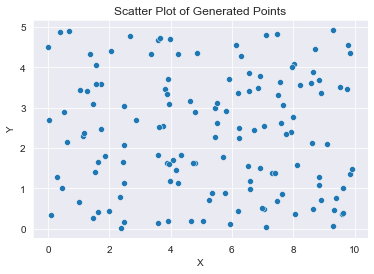

Generated Points: [(1.1379842760561187, 2.300043013241508), (1.7323501533359953, 3.584355843879231), (3.5803264151007186, 1.8207391182030952), (6.563106562351315, 3.4232534330363413), (2.468325265858544, 2.062597443025187)]
Pairwise Distances: [[0.0, 1.4151785198395848, 2.4889289559872827, 5.540176303006295, 1.3513650683526828, 7.964778601031504, 6.582883889231444, 4.367339458277172, 6.253334482235598, 3.7262500365225812, 3.276526943004176, 4.409556641090782, 3.428173278577363, 5.083933862978532, 7.836923696928141, 2.6138376683831948, 5.574330900749455, 5.109598073736851, 8.771260156354378, 5.905501106796874, 4.379889769149521, 2.6468517383737087, 4.449876401231312, 3.0150212939554466, 1.3142186798477156, 3.0662525759795005, 0.9802278208567278, 4.595708179171249, 6.647542868808383, 7.123300086540436, 0.6088349457756772, 2.9366404702758806, 6.568058900680588, 7.1875926295747234, 8.4166739762061, 8.942189654638241, 8.66878999463659, 3.3221599721716353, 0.5484820558434521, 7.7779747683482

In [231]:
points, distances = generate_points(length, height, num_points)
print('Generated Points:', points[:5])
print('Pairwise Distances:', distances[:1])

In [232]:
import itertools

def find_shortest_route(points):

    num_points = len(points)
    distances = [[0] * num_points for _ in range(num_points)]
    for i in range(num_points):
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            distances[i][j] = dist

    current_point = random.randint(0, num_points - 1)
    route = [current_point]

    while len(route) < num_points:
        nearest_neighbor = None
        nearest_distance = float('inf')
        for i in range(num_points):
            if i not in route and distances[current_point][i] < nearest_distance:
                nearest_neighbor = i
                nearest_distance = distances[current_point][i]

        
        route.append(nearest_neighbor)
        current_point = nearest_neighbor

    length = 0
    for i in range(num_points):
        length += distances[route[i]][route[(i + 1) % num_points]]

    return route, length


In [233]:
shortest_route, shortest_length = find_shortest_route(points)

In [234]:
from typing import List, Tuple
from math import sqrt
from random import randrange

def two_opt_algorithm(points: List[Tuple[float, float]], shortest_route: List[int], shortest_length: float, max_iterations: int=1000) -> Tuple[List[int], float]:

    point_dict = {point: i for i, point in enumerate(points)}
    indices = shortest_route.copy()

    def calculate_length(route: List[int]) -> float:
        length = 0
        for i in range(len(route) - 1):
            dist = sqrt((points[route[i]][0] - points[route[i+1]][0]) ** 2 + (points[route[i]][1] - points[route[i+1]][1]) ** 2)
            length += dist
        return length

    best_route = indices.copy()
    best_length = shortest_length
    for i in range(max_iterations):

        idx1, idx2 = sorted([randrange(len(points)) for _ in range(2)])
        new_route = indices[:idx1] + indices[idx1:idx2+1][::-1] + indices[idx2+1:]
        new_length = calculate_length(new_route)

        if new_length < best_length:
            best_route = new_route.copy()
            best_length = new_length

        indices = best_route.copy()

    optimized_route = [list(point_dict.keys())[list(point_dict.values()).index(idx)] for idx in best_route]
    optimized_route = [points.index(point) + 1 for point in optimized_route]

    return optimized_route, best_length


In [235]:
optimized_route, optimized_length = two_opt_algorithm(points, shortest_route, shortest_length)


In [236]:
print(shortest_length-optimized_length)

11.712931138022881
